# pypandoc教程

## 背景介绍
* 在日常办公中,往往需要将文档类型进行转换。其中代表性的文档格式txt、markdown、html、docx、pdf格式。

## 软件安装

In [ ]:
!pip install pypandoc

In [6]:
import pypandoc
print(pypandoc.get_pandoc_version())

2.2.3.2


## 使用说明

### MARKDOWN-> HTML

In [8]:
m_input = 
"""
# Pandoc测试文档

## 用法

- `convert_text`
- `convert_file`
"""
output = pypandoc.convert_text(m_input, 'html', format='md',outputfile="results.html")
print(output)

### markdown-> epub

In [6]:
%%time
pypandoc.convert_file('pandas_cookbook.md', 'epub', 'md', outputfile='results.epub')

CPU times: user 0 ns, sys: 31.2 ms, total: 31.2 ms
Wall time: 1.23 s


''

### markdown-> docx

In [11]:
pypandoc.convert_file('pandas_cookbook.md', 'docx', 'md', outputfile='results.docx')

CPU times: user 0 ns, sys: 93.8 ms, total: 93.8 ms
Wall time: 2.19 s


''

### markdown->rst

In [19]:
%%time
pypandoc.convert_file('pandas_cookbook.md', 'rst', 'md', outputfile='results.rst')

## 命令行参数
* 也可以使用命令行来转换文件格式

In [ ]:
!pandoc -s -o doc.pdf doc.md
!pandoc -s -V geometry:margin=1in -o documentation.pdf part01.md part02.md

In [1]:
from pyecharts.globals import CurrentConfig, NotebookType,ThemeType,OnlineHostType
CurrentConfig.NOTEBOOK_TYPE = NotebookType.JUPYTER_LAB

import pyecharts.options as opts
from pyecharts.charts import Bar, Line,Grid
from pyecharts.faker import Faker
from pyecharts.commons.utils import JsCode
import numpy as np

In [3]:
bar = (
    Bar(init_opts=opts.InitOpts(
        bg_color='rgba(255,255,255,1)',
        width='800px',
        height='600px'
    ))
    .add_xaxis(Faker.choose())
    .add_yaxis("商家A", Faker.values(), category_gap="60%")
    .set_series_opts(
        itemstyle_opts={
            "normal": {
                "color": JsCode(
                    """new echarts.graphic.LinearGradient(0, 0, 0, 1, [{
                offset: 0,
                color: 'rgba(0, 244, 255, 1)'
            }, {
                offset: 1,
                color: 'rgba(0, 77, 167, 1)'
            }], false)"""
                ),
                "barBorderRadius": [30, 30, 30, 30],
                "shadowColor": "rgb(0, 160, 221)",
            }
        }
    )
    .set_global_opts(title_opts=opts.TitleOpts(title="Bar-渐变圆柱"))
)
bar.load_javascript()

In [4]:
bar.render_notebook()

In [1]:
import pandas as pd
import numpy as np
df = pd.DataFrame(np.random.randint(0, 11, size=(1000000, 5)), columns=('a','b','c','d','e'))

In [2]:
def func(a,b,c,d,e):
    if e == 10:
        return c*d
    elif (e < 10) and (e>=5):
        return c+d
    elif e < 5:
        return a+b

In [3]:
%%time
df['new'] = df.apply(lambda x: func(x['a'], x['b'], x['c'], x['d'], x['e']), axis=1)

CPU times: user 22.3 s, sys: 266 ms, total: 22.5 s
Wall time: 22.7 s


In [4]:
%%time
# !pip install swifter
import swifter
df['new'] = df.swifter.apply(lambda x : func(x['a'],x['b'],x['c'],x['d'],x['e']),axis=1)

Dask Apply:   0%|          | 0/32 [00:00<?, ?it/s]

CPU times: user 1.05 s, sys: 2.69 s, total: 3.73 s
Wall time: 9.51 s


In [5]:
%%time

df['new'] = df['c'] * df['d'] #default case e = =10
mask = df['e'] < 10
df.loc[mask,'new'] = df['c'] + df['d']
mask = df['e'] < 5
df.loc[mask,'new'] = df['a'] + df['b']

CPU times: user 78.1 ms, sys: 46.9 ms, total: 125 ms
Wall time: 137 ms


In [8]:
%%time
df['new'] = df['c'].values * df['d'].values #default case e = =10
mask = df['e'].values < 10
df.loc[mask,'new'] = df['c'] + df['d']
mask = df['e'].values < 5
df.loc[mask,'new'] = df['a'] + df['b']

CPU times: user 125 ms, sys: 93.8 ms, total: 219 ms
Wall time: 177 ms


In [1]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from dython.model_utils import metric_graph

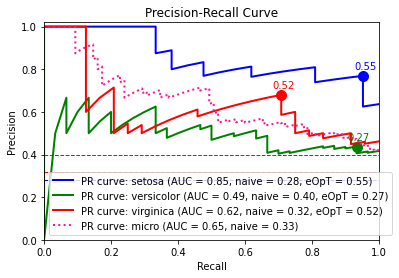

{'setosa': {'auc': {'val': 0.8544095870351327, 'naive': 0.28},
  'eopt': {'val': 0.5462184043680318,
   'x': 0.9523809523809523,
   'y': 0.7692307692307693}},
 'versicolor': {'auc': {'val': 0.48759634402345675, 'naive': 0.4},
  'eopt': {'val': 0.26620213686403266, 'x': 0.9333333333333333, 'y': 0.4375}},
 'virginica': {'auc': {'val': 0.6204076571088714, 'naive': 0.32},
  'eopt': {'val': 0.5162119301742859, 'x': 0.7083333333333334, 'y': 0.68}},
 'ax': <AxesSubplot:title={'center':'Precision-Recall Curve'}, xlabel='Recall', ylabel='Precision'>}

In [2]:

# Load data
iris = datasets.load_iris()
X = iris.data
y = label_binarize(iris.target, classes=[0, 1, 2])

# Add noisy features
random_state = np.random.RandomState(4)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# Train a model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True, random_state=0))

# Predict
y_score = classifier.fit(X_train, y_train).predict_proba(X_test)

# Plot ROC graphs
metric_graph(y_test, y_score, 'pr', class_names=iris.target_names)